## Capstone Project Notebook 03/02/2026 Function 3 Week 2##
### 3D Optimization with Bayesian Optimization
### Goal: MAXIMIZE the objective function (find least negative value)

In [37]:
# Section 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel, Matern
from scipy.stats import norm
from scipy.optimize import minimize

## Load Updated Dataset (Week 2)
F3 is a **3D problem** - more challenging than F1 and F2!

In [38]:
# Load the updated dataset
INPUT_FILE = 'f3_w2_inputs.npy'   # Shape (16, 3)
OUTPUT_FILE = 'f3_w2_outputs.npy' # Shape (16,)

In [39]:
X = np.load(INPUT_FILE)  # 3D inputs
Y = np.load(OUTPUT_FILE) # Outputs

In [40]:
# Display all data points
print("Input function 3 data: \n", X)
print("\nOutput function 3 data: \n", Y)

Input function 3 data: 
 [[0.17152521 0.34391687 0.2487372 ]
 [0.24211446 0.64407427 0.27243281]
 [0.53490572 0.39850092 0.17338873]
 [0.49258141 0.61159319 0.34017639]
 [0.13462167 0.21991724 0.45820622]
 [0.34552327 0.94135983 0.26936348]
 [0.15183663 0.43999062 0.99088187]
 [0.64550284 0.39714294 0.91977134]
 [0.74691195 0.28419631 0.22629985]
 [0.17047699 0.6970324  0.14916943]
 [0.22054934 0.29782524 0.34355534]
 [0.66601366 0.67198515 0.2462953 ]
 [0.04680895 0.23136024 0.77061759]
 [0.60009728 0.72513573 0.06608864]
 [0.96599485 0.86111969 0.56682913]
 [0.965995   0.517677   0.402788  ]]

Output function 3 data: 
 [-0.1121222  -0.08796286 -0.11141465 -0.03483531 -0.04800758 -0.11062091
 -0.39892551 -0.11386851 -0.13146061 -0.09418956 -0.04694741 -0.10596504
 -0.11804826 -0.03637783 -0.05675837 -0.01357739]


In [41]:
print(f"Loaded {X.shape[0]} points in {X.shape[1]}D (3D problem!)")
print(f"Current best (MAXIMUM/least negative): {Y.max():.6f} at {X[Y.argmax()]}")
print(f"Note: We're MAXIMIZING - finding the least negative value!")
X = np.atleast_2d(X)
Y = Y.ravel()

Loaded 16 points in 3D (3D problem!)
Current best (MAXIMUM/least negative): -0.013577 at [0.965995 0.517677 0.402788]
Note: We're MAXIMIZING - finding the least negative value!


## Data Analysis

In [42]:
print("="*70)
print("F3 DATASET ANALYSIS (3D)")
print("="*70)
print(f"\nInput ranges:")
print(f"  X1: [{X[:, 0].min():.4f}, {X[:, 0].max():.4f}]")
print(f"  X2: [{X[:, 1].min():.4f}, {X[:, 1].max():.4f}]")
print(f"  X3: [{X[:, 2].min():.4f}, {X[:, 2].max():.4f}]")

print(f"\nOutput statistics:")
print(f"  Best (max/least negative): {Y.max():.6f}")
print(f"  Worst (most negative):     {Y.min():.6f}")
print(f"  Mean:                      {Y.mean():.6f}")
print(f"  Median:                    {np.median(Y):.6f}")
print(f"  Std:                       {Y.std():.6f}")

# Find best point (MAXIMUM = least negative)
best_idx = np.argmax(Y)
print(f"\n🎯 BEST POINT SO FAR (LEAST NEGATIVE):")
print(f"  Input:  [{X[best_idx, 0]:.6f}, {X[best_idx, 1]:.6f}, {X[best_idx, 2]:.6f}]")
print(f"  Output: {Y[best_idx]:.6f}")

# Show all points sorted
sorted_indices = np.argsort(Y)[::-1]
print(f"\n📊 ALL DATA POINTS (sorted, least negative first):")
for i in range(len(Y)):
    idx = sorted_indices[i]
    marker = "⭐" if idx == best_idx else "  "
    print(f"{marker} {i+1:2d}. X=[{X[idx, 0]:.4f}, {X[idx, 1]:.4f}, {X[idx, 2]:.4f}] → Y={Y[idx]:.6f}")

F3 DATASET ANALYSIS (3D)

Input ranges:
  X1: [0.0468, 0.9660]
  X2: [0.2199, 0.9414]
  X3: [0.0661, 0.9909]

Output statistics:
  Best (max/least negative): -0.013577
  Worst (most negative):     -0.398926
  Mean:                      -0.101318
  Median:                    -0.100077
  Std:                       0.084628

🎯 BEST POINT SO FAR (LEAST NEGATIVE):
  Input:  [0.965995, 0.517677, 0.402788]
  Output: -0.013577

📊 ALL DATA POINTS (sorted, least negative first):
⭐  1. X=[0.9660, 0.5177, 0.4028] → Y=-0.013577
    2. X=[0.4926, 0.6116, 0.3402] → Y=-0.034835
    3. X=[0.6001, 0.7251, 0.0661] → Y=-0.036378
    4. X=[0.2205, 0.2978, 0.3436] → Y=-0.046947
    5. X=[0.1346, 0.2199, 0.4582] → Y=-0.048008
    6. X=[0.9660, 0.8611, 0.5668] → Y=-0.056758
    7. X=[0.2421, 0.6441, 0.2724] → Y=-0.087963
    8. X=[0.1705, 0.6970, 0.1492] → Y=-0.094190
    9. X=[0.6660, 0.6720, 0.2463] → Y=-0.105965
   10. X=[0.3455, 0.9414, 0.2694] → Y=-0.110621
   11. X=[0.5349, 0.3985, 0.1734] → Y=-0.111415

## Section 2: Fit Gaussian Process Surrogate Model

In [43]:
# Kernel for 3D problem
kernel = ConstantKernel(1.0, constant_value_bounds=(1e-3, 1e3)) * \
         Matern(length_scale=0.5, length_scale_bounds=(0.01, 10.0), nu=2.5) + \
         WhiteKernel(noise_level=1e-3, noise_level_bounds=(1e-8, 1e-1))

In [44]:
gp = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=25,
    normalize_y=True,
    random_state=42
)

In [45]:
# Fit the GP model
gp.fit(X, Y)
print(f"GP fitted. Learned kernel: {gp.kernel_}")

GP fitted. Learned kernel: 1.11**2 * Matern(length_scale=0.23, nu=2.5) + WhiteKernel(noise_level=2.11e-08)


## Section 3: Define Acquisition Functions
**Configured for MAXIMIZATION (finding least negative)**

In [46]:
def expected_improvement(X_new, gp, y_best, xi=0.01):
    """EI for maximization"""
    mu, sigma = gp.predict(X_new, return_std=True)
    sigma = np.maximum(sigma, 1e-9)
    imp = mu - y_best - xi
    Z = imp / sigma
    ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
    ei[sigma < 1e-9] = 0.0
    return ei

def upper_confidence_bound(X_new, gp, kappa=2.0):
    """UCB for maximization"""
    mu, sigma = gp.predict(X_new, return_std=True)
    return mu + kappa * sigma

## Section 4: Optimize Acquisition Functions

In [47]:
# Define search bounds (3D)
bounds = [(0.0, 1.0), (0.0, 1.0), (0.0, 1.0)]

# Current best value
y_best = Y.max()

print("="*70)
print("OPTIMIZING EXPECTED IMPROVEMENT (EI)")
print("="*70)

def neg_ei(x):
    return -expected_improvement(x.reshape(1, -1), gp, y_best, xi=0.01)[0]

best_ei = np.inf
x_next_ei = None

# More restarts for 3D
for i in range(50):
    x0 = np.array([np.random.uniform(b[0], b[1]) for b in bounds])
    result = minimize(neg_ei, x0, bounds=bounds, method='L-BFGS-B')
    
    if result.fun < best_ei:
        best_ei = result.fun
        x_next_ei = result.x

mu_ei, sigma_ei = gp.predict(x_next_ei.reshape(1, -1), return_std=True)

print(f"EI suggests: [{x_next_ei[0]:.6f}, {x_next_ei[1]:.6f}, {x_next_ei[2]:.6f}]")
print(f"Predicted value: {mu_ei[0]:.6f} ± {sigma_ei[0]:.6f}")
print(f"Expected Improvement: {-best_ei:.6f}")

OPTIMIZING EXPECTED IMPROVEMENT (EI)
EI suggests: [1.000000, 0.536593, 0.577997]
Predicted value: -0.031632 ± 0.068294
Expected Improvement: 0.015485


In [48]:
print("\n" + "="*70)
print("OPTIMIZING UPPER CONFIDENCE BOUND (UCB)")
print("="*70)

kappa = 2.0

def neg_ucb(x):
    return -upper_confidence_bound(x.reshape(1, -1), gp, kappa)[0]

best_ucb = np.inf
x_next_ucb = None

for i in range(50):
    x0 = np.array([np.random.uniform(b[0], b[1]) for b in bounds])
    result = minimize(neg_ucb, x0, bounds=bounds, method='L-BFGS-B')
    
    if result.fun < best_ucb:
        best_ucb = result.fun
        x_next_ucb = result.x

mu_ucb, sigma_ucb = gp.predict(x_next_ucb.reshape(1, -1), return_std=True)

print(f"UCB suggests: [{x_next_ucb[0]:.6f}, {x_next_ucb[1]:.6f}, {x_next_ucb[2]:.6f}]")
print(f"Predicted value: {mu_ucb[0]:.6f} ± {sigma_ucb[0]:.6f}")
print(f"UCB value: {-best_ucb:.6f}")


OPTIMIZING UPPER CONFIDENCE BOUND (UCB)
UCB suggests: [1.000000, 0.502620, 0.653972]
Predicted value: -0.050137 ± 0.081051
UCB value: 0.111964


## Section 5: Local Refinement Strategy

In [49]:
print("\n" + "="*70)
print("LOCAL REFINEMENT - Points near current best")
print("="*70)

best_idx = np.argmax(Y)
best_point = X[best_idx]

step_size = 0.05
local_points = [
    [best_point[0] - step_size, best_point[1], best_point[2]],
    [best_point[0] + step_size, best_point[1], best_point[2]],
    [best_point[0], best_point[1] - step_size, best_point[2]],
    [best_point[0], best_point[1] + step_size, best_point[2]],
    [best_point[0], best_point[1], best_point[2] - step_size],
    [best_point[0], best_point[1], best_point[2] + step_size],
]

print(f"Current best: [{best_point[0]:.6f}, {best_point[1]:.6f}, {best_point[2]:.6f}] → {Y[best_idx]:.6f}\n")

best_local_pred = -np.inf
best_local_point = None

for i, lp in enumerate(local_points, 1):
    if all(bounds[j][0] <= lp[j] <= bounds[j][1] for j in range(3)):
        mu, std = gp.predict(np.array(lp).reshape(1, -1), return_std=True)
        print(f"  Option {i}: [{lp[0]:.6f}, {lp[1]:.6f}, {lp[2]:.6f}] → Predicted: {mu[0]:.6f} ± {std[0]:.6f}")
        
        if mu[0] > best_local_pred:
            best_local_pred = mu[0]
            best_local_point = lp

if best_local_point:
    print(f"\nBest local refinement: [{best_local_point[0]:.6f}, {best_local_point[1]:.6f}, {best_local_point[2]:.6f}]")


LOCAL REFINEMENT - Points near current best
Current best: [0.965995, 0.517677, 0.402788] → -0.013577

  Option 1: [0.915995, 0.517677, 0.402788] → Predicted: -0.022841 ± 0.024005
  Option 3: [0.965995, 0.467677, 0.402788] → Predicted: -0.018952 ± 0.024241
  Option 4: [0.965995, 0.567677, 0.402788] → Predicted: -0.015826 ± 0.023799
  Option 5: [0.965995, 0.517677, 0.352788] → Predicted: -0.022665 ± 0.024749
  Option 6: [0.965995, 0.517677, 0.452788] → Predicted: -0.012142 ± 0.024914

Best local refinement: [0.965995, 0.517677, 0.452788]


## Section 6: Visualization

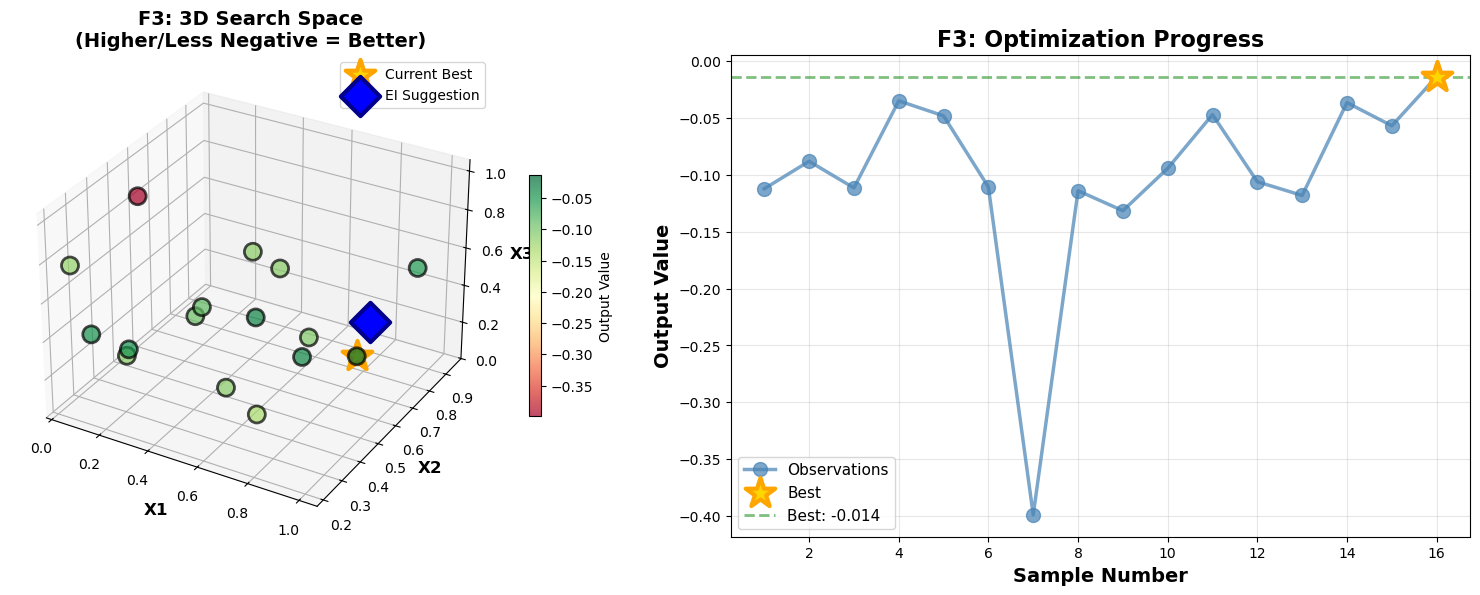

In [50]:
# Create 3D visualization
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Plot 1: 3D scatter
scatter = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap='RdYlGn', 
                     s=150, alpha=0.7, edgecolors='black', linewidth=2)
ax1.scatter(X[best_idx, 0], X[best_idx, 1], X[best_idx, 2],
           c='gold', s=500, marker='*', 
           edgecolors='orange', linewidth=3, label='Current Best', zorder=10)
ax1.scatter(x_next_ei[0], x_next_ei[1], x_next_ei[2],
           c='blue', s=400, marker='D', 
           edgecolors='darkblue', linewidth=3, label='EI Suggestion', zorder=10)

ax1.set_xlabel('X1', fontsize=12, fontweight='bold')
ax1.set_ylabel('X2', fontsize=12, fontweight='bold')
ax1.set_zlabel('X3', fontsize=12, fontweight='bold')
ax1.set_title('F3: 3D Search Space\n(Higher/Less Negative = Better)', 
             fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
fig.colorbar(scatter, ax=ax1, label='Output Value', shrink=0.5)

# Plot 2: Progress
ax2.plot(range(1, len(Y)+1), Y, 'o-', linewidth=2.5, markersize=10, 
        color='steelblue', alpha=0.7, label='Observations')
ax2.scatter(best_idx+1, Y[best_idx], c='gold', s=500, marker='*',
           edgecolors='orange', linewidth=3, label='Best', zorder=10)
ax2.axhline(y=Y[best_idx], color='green', linestyle='--', linewidth=2,
           alpha=0.5, label=f'Best: {Y[best_idx]:.3f}')
ax2.set_xlabel('Sample Number', fontsize=14, fontweight='bold')
ax2.set_ylabel('Output Value', fontsize=14, fontweight='bold')
ax2.set_title('F3: Optimization Progress', fontsize=16, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Section 7: Final Recommendation

In [51]:
print("\n" + "="*70)
print("🎯 FINAL RECOMMENDATION FOR F3 WEEK 2")
print("="*70)

print("\nCurrent Status:")
print(f"  Best value so far: {Y[best_idx]:.6f}")
print(f"  Best point: [{X[best_idx, 0]:.6f}, {X[best_idx, 1]:.6f}, {X[best_idx, 2]:.6f}]")

print("\nStrategy Options:")
print(f"\n1. Expected Improvement (EI) - RECOMMENDED ⭐⭐⭐")
print(f"   Point: [{x_next_ei[0]:.6f}, {x_next_ei[1]:.6f}, {x_next_ei[2]:.6f}]")
print(f"   Predicted: {mu_ei[0]:.6f} ± {sigma_ei[0]:.6f}")
print(f"   Rationale: Best for 3D exploration")

print(f"\n2. Upper Confidence Bound (UCB) - More Exploratory")
print(f"   Point: [{x_next_ucb[0]:.6f}, {x_next_ucb[1]:.6f}, {x_next_ucb[2]:.6f}]")
print(f"   Predicted: {mu_ucb[0]:.6f} ± {sigma_ucb[0]:.6f}")
print(f"   Rationale: Explores uncertain regions")

if best_local_point:
    print(f"\n3. Local Refinement - Conservative")
    print(f"   Point: [{best_local_point[0]:.6f}, {best_local_point[1]:.6f}, {best_local_point[2]:.6f}]")
    print(f"   Predicted: {best_local_pred:.6f}")
    print(f"   Rationale: Refines around current best")

print("\n" + "="*70)
print("💡 SUBMISSION")
print("="*70)
print(f"\nRecommended next point (EI): [{x_next_ei[0]:.6f}, {x_next_ei[1]:.6f}, {x_next_ei[2]:.6f}]")
print("\n3D Note: Bayesian Optimization is essential for efficient 3D exploration!")
print("="*70)


🎯 FINAL RECOMMENDATION FOR F3 WEEK 2

Current Status:
  Best value so far: -0.013577
  Best point: [0.965995, 0.517677, 0.402788]

Strategy Options:

1. Expected Improvement (EI) - RECOMMENDED ⭐⭐⭐
   Point: [1.000000, 0.536593, 0.577997]
   Predicted: -0.031632 ± 0.068294
   Rationale: Best for 3D exploration

2. Upper Confidence Bound (UCB) - More Exploratory
   Point: [1.000000, 0.502620, 0.653972]
   Predicted: -0.050137 ± 0.081051
   Rationale: Explores uncertain regions

3. Local Refinement - Conservative
   Point: [0.965995, 0.517677, 0.452788]
   Predicted: -0.012142
   Rationale: Refines around current best

💡 SUBMISSION

Recommended next point (EI): [1.000000, 0.536593, 0.577997]

3D Note: Bayesian Optimization is essential for efficient 3D exploration!


## Section 8: Format Output for Submission

In [52]:
# Choose which method to use
USE_EI = True

if USE_EI:
    x_next = x_next_ei
    method_name = "Expected Improvement (EI)"
else:
    x_next = x_next_ucb
    method_name = "Upper Confidence Bound (UCB)"

print("\n" + "="*70)
print("QUERY SUBMISSION")
print("="*70)
print(f"Method: {method_name}")
print(f"Function 3 - Next point: [{x_next[0]:.6f}, {x_next[1]:.6f}, {x_next[2]:.6f}]")
print("="*70)


QUERY SUBMISSION
Method: Expected Improvement (EI)
Function 3 - Next point: [1.000000, 0.536593, 0.577997]
